## Market Segmentation Project(A Machine learning based market segmentation project)



### OBJECTIVE

This case requires to develop a customer segmentation to give recommendations like saving plans, loans, wealth management, etc. on target customers groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("Customer Data.csv")

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [6]:
# Changing columns manually
df.columns = ['customer_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installment_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchase_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure']

In [7]:
# Test
df.head()

,customer_id,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
df.isnull().sum()

customer_id                           0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installment_purchases                 0
cash_advance                          0
purchases_frequency                   0
oneoff_purchase_frequency             0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [10]:
# Impute missing records
df['minimum_payments'] = df['minimum_payments'].fillna(df['minimum_payments'].mean())
df['credit_limit'] = df['credit_limit'].fillna(df['credit_limit'].mean())

In [11]:
#Test
df.isnull().sum()

customer_id                         0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installment_purchases               0
cash_advance                        0
purchases_frequency                 0
oneoff_purchase_frequency           0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [13]:
# checking for duplicates from the data set
df.duplicated().sum()

0

In [14]:
df.drop(columns = ['customer_id'], axis = 1, inplace = True)

In [15]:
# Test 
df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installment_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchase_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

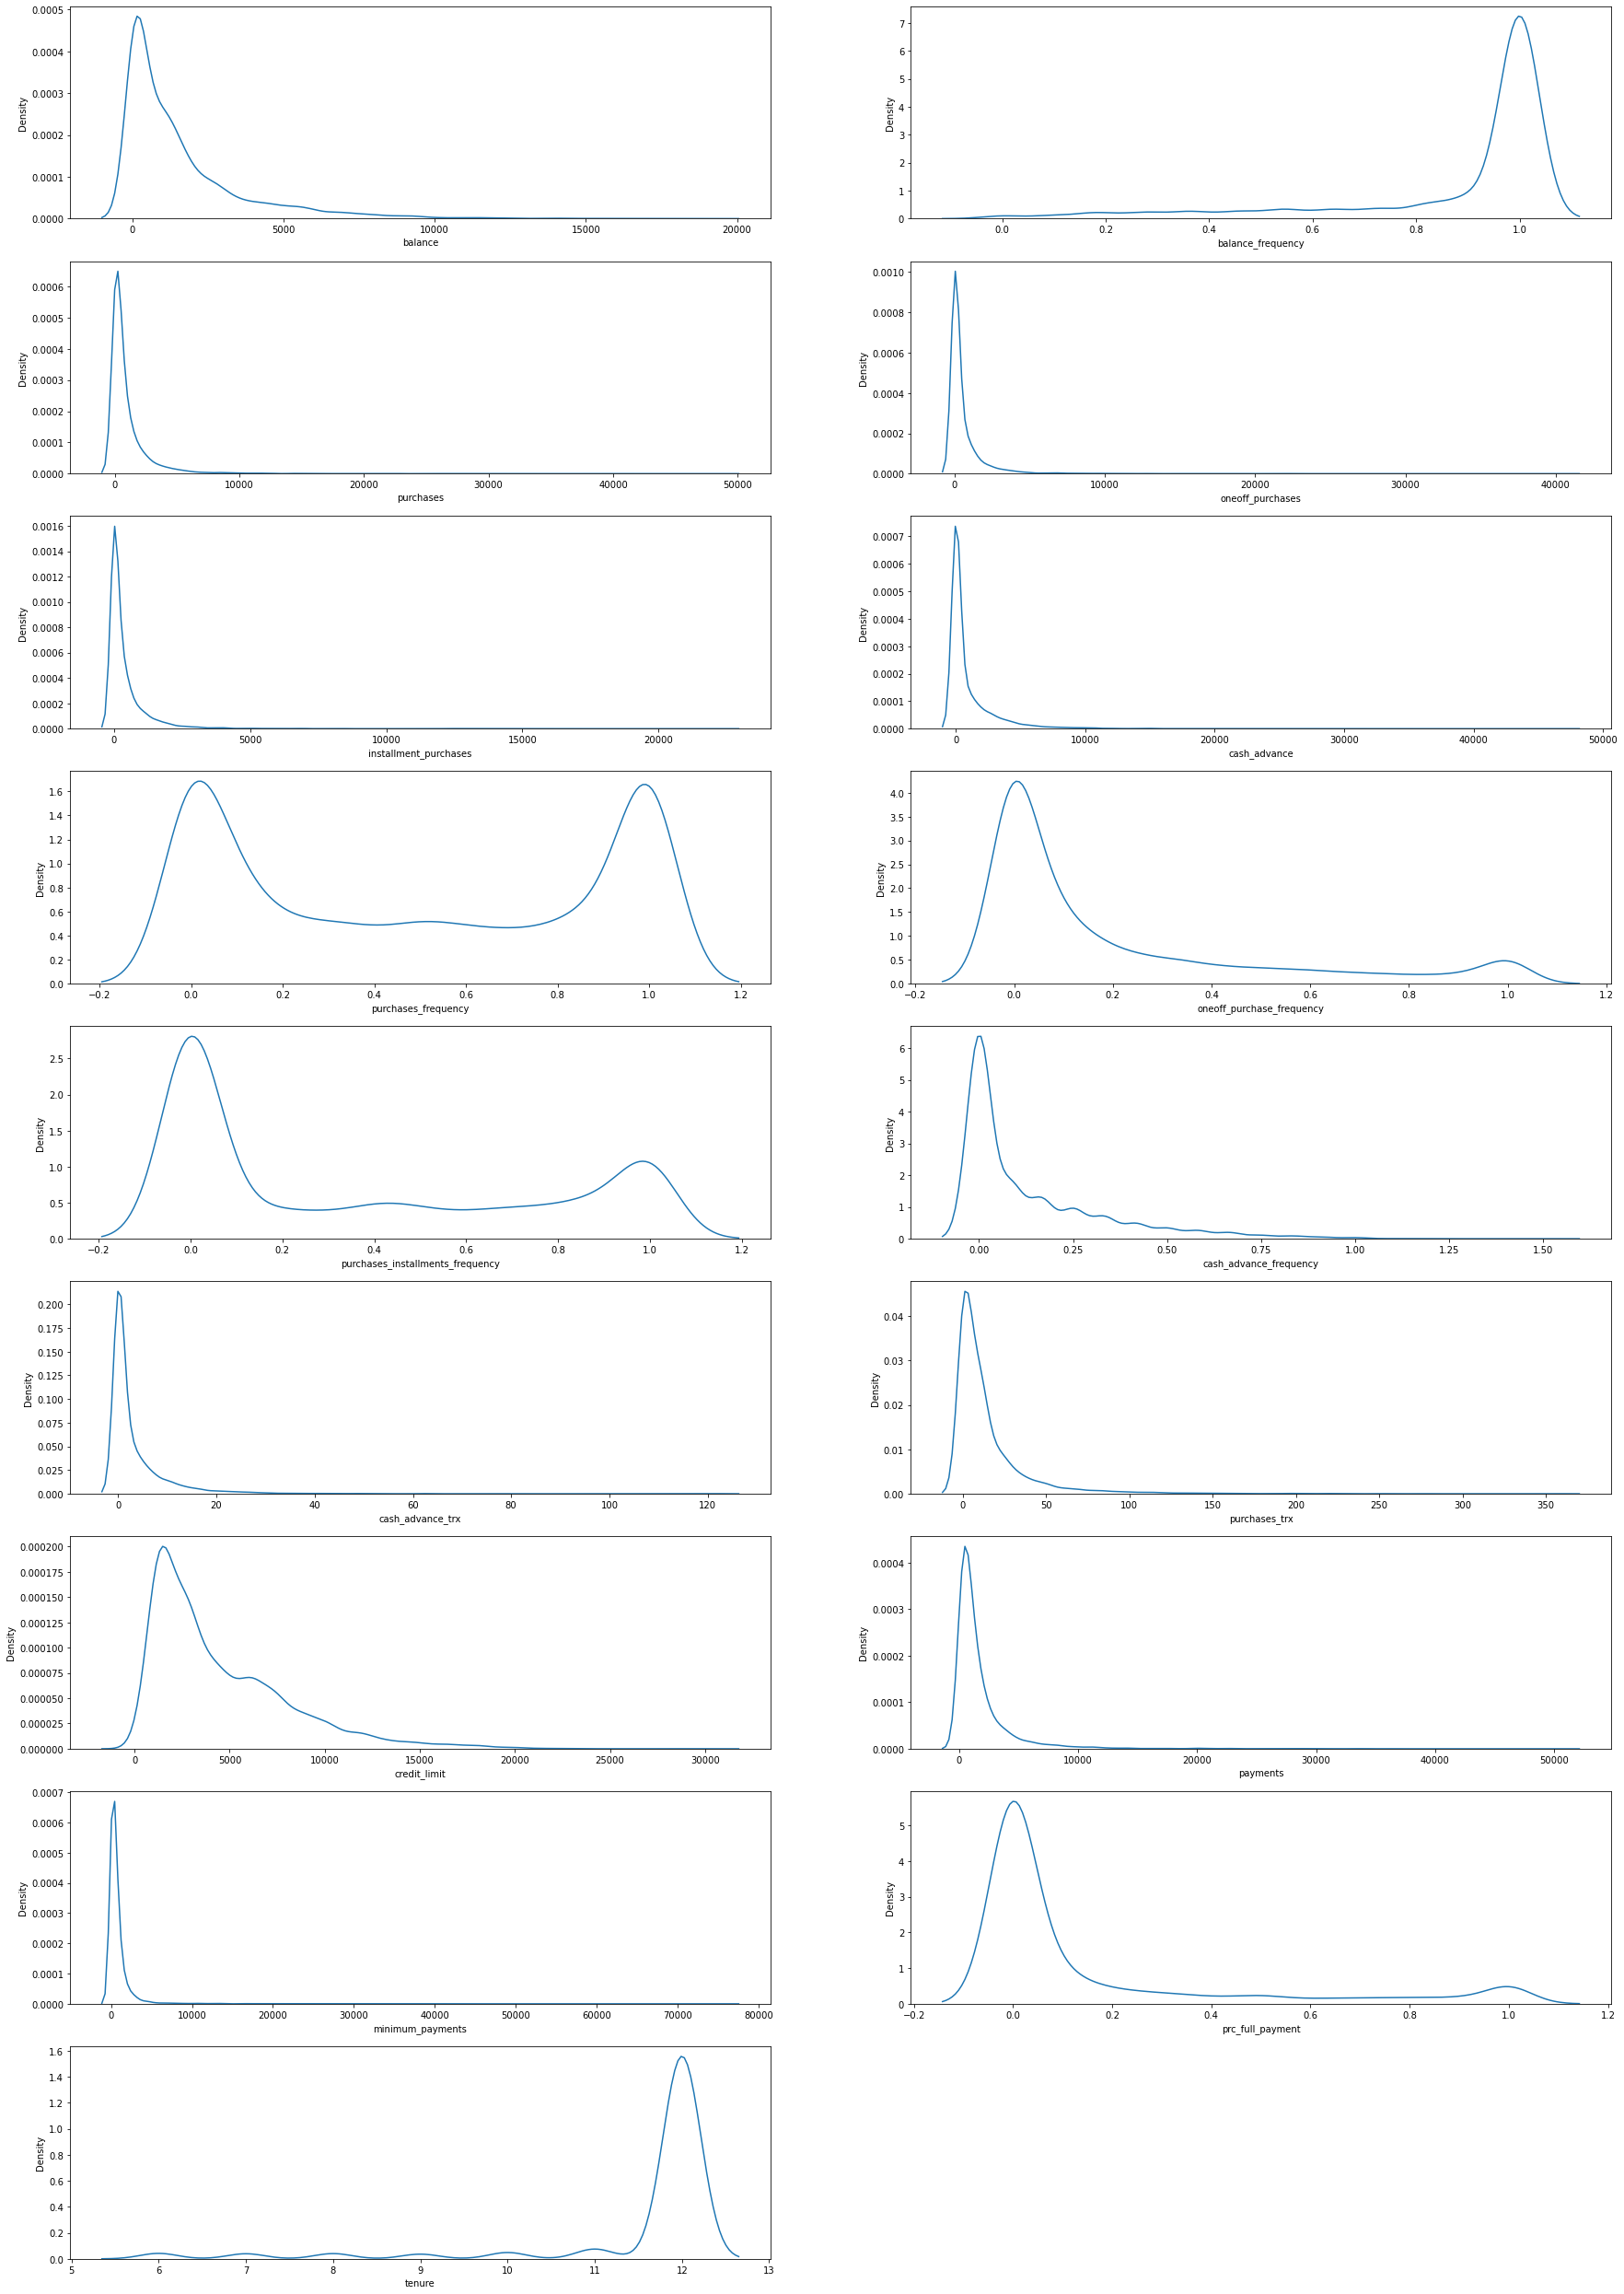

In [17]:
plt.figure(figsize = (30, 45))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax = ax)
        plt.xlabel(col)
plt.show()

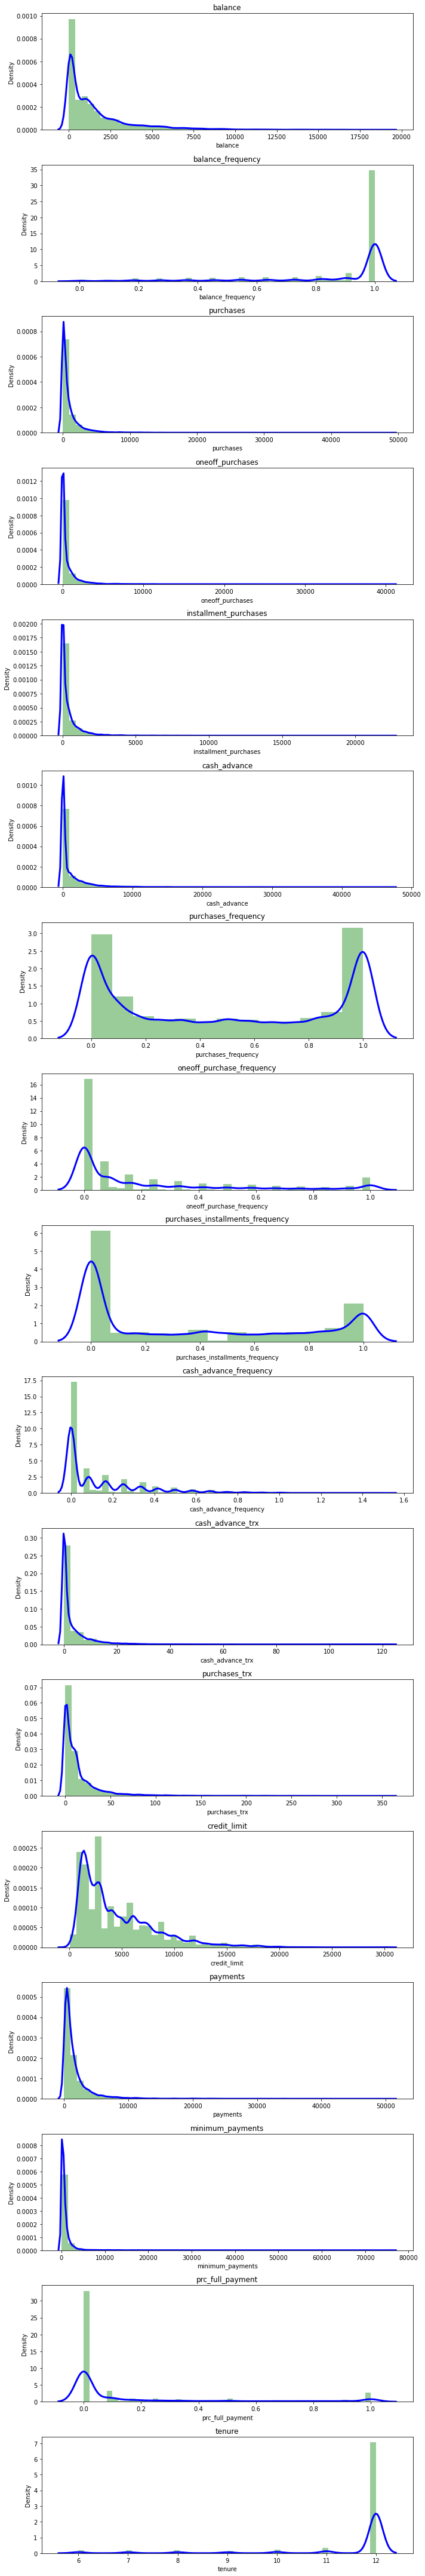

In [19]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'b', 'bw':0.1, 'lw':3, 'label':'KDE'}, hist_kws ={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

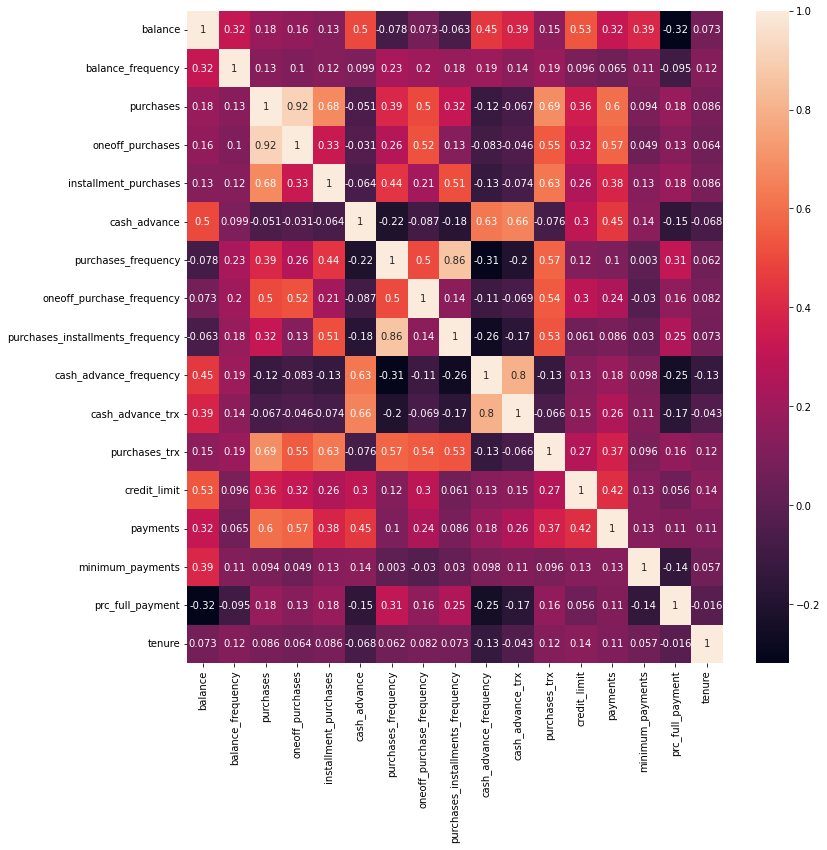

In [20]:
# lets plot a correlation heatmap
plt.figure(figsize= (12,12))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Sacling the dataset

In [23]:
scalar = StandardScaler()
scaled_df = scalar.fit_transform(df)

### Reducing dimensionality with PCA

In [25]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principal_components, columns = ['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076447
1,-1.138291,2.506533
2,0.969681,-0.383556
3,-0.873631,0.043146
4,-1.599433,-0.688572
...,...,...
8945,-0.359630,-2.016158
8946,-0.564374,-1.639180
8947,-0.926205,-1.810802
8948,-2.336551,-0.657963


### Perform some hyperparameter tuning


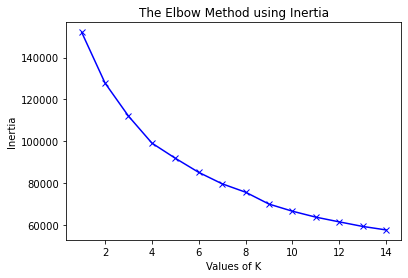

In [26]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters = i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

Slight curve at 4, so we can take the k value as 4

## Model Building

In [28]:
kmeans_model = KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans = pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})], axis = 1)

## Visualize

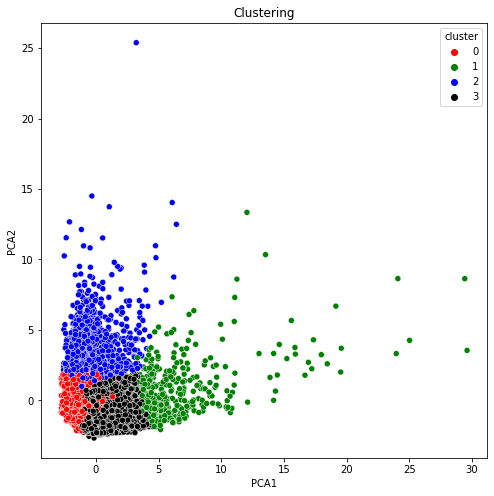

In [31]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df_kmeans, palette = ['red', 'green','blue', 'black'])
plt.title('Clustering')
plt.show()

We observe that four clusters have been formed

## Lets create a cluster center

In [34]:
cluster_centers = pd.DataFrame(data = kmeans_model.cluster_centers_, columns=[df.columns])

# Inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])

# print
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1011.751528,0.789871,269.973466,209.853863,60.386625,595.759339,0.170146,0.086281,0.080578,0.114833,2.125503,2.903421,3277.703165,974.505090,586.301239,0.078001,11.446429
1,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
2,4602.462714,0.968415,501.896219,320.373681,181.607404,4520.724309,0.287731,0.138934,0.185516,0.484526,14.284641,7.661102,7546.957050,3481.145990,2008.251157,0.034859,11.387312
3,894.907458,0.934734,1236.178934,593.974874,642.478274,210.570626,0.885165,0.297070,0.711842,0.042573,0.790021,22.091773,4213.207678,1332.194205,650.167072,0.269258,11.594595


### Create a target column 'cluster' for storing cluster segments

In [35]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster': kmeans_model.labels_})], axis = 1)
cluster_df

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


### Lets get new dataframe for all the cluster centers and further analyse them

In [37]:
# cluster 1
cluster_1_df = cluster_df[cluster_df['Cluster'] == 0]
cluster_1_df

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [38]:
cluster_2_df = cluster_df[cluster_df['Cluster'] == 1]
cluster_2_df

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,1
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,1
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,1
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,1
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,1
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,1
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,1


In [39]:
cluster_3_df = cluster_df[cluster_df['Cluster'] == 2]
cluster_3_df

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,2
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,2
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,2
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,2
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,2
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,2
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,2


In [40]:
cluster_4_df = cluster_df[cluster_df['Cluster'] == 3]
cluster_4_df

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,3
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,3
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,3
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,3
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,3
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,3
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6,3


### Visualize

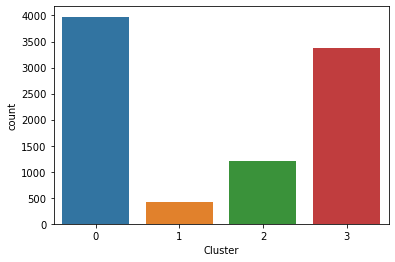

In [41]:
sns.countplot(x = 'Cluster', data = cluster_df);

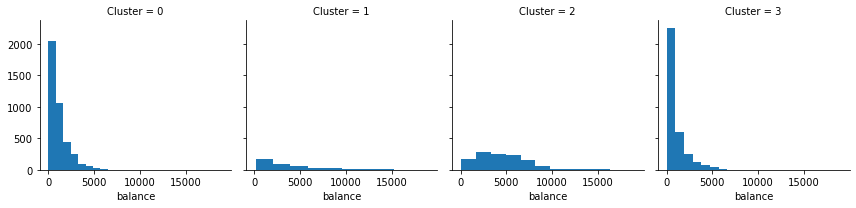

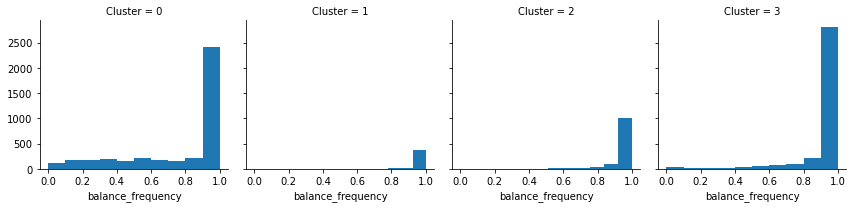

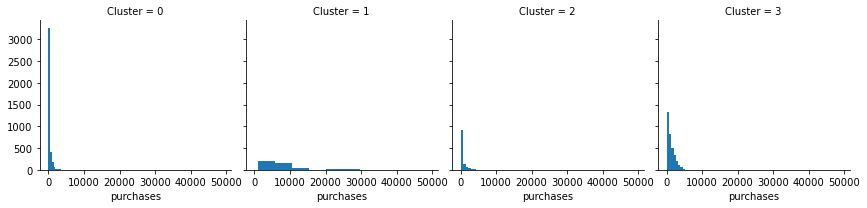

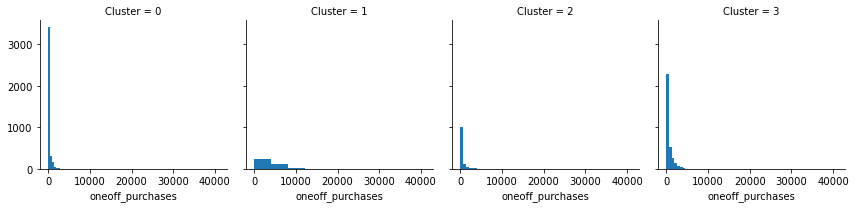

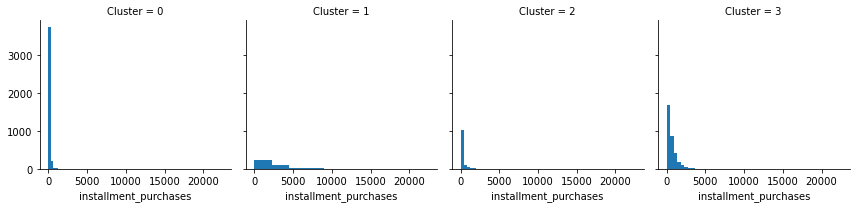

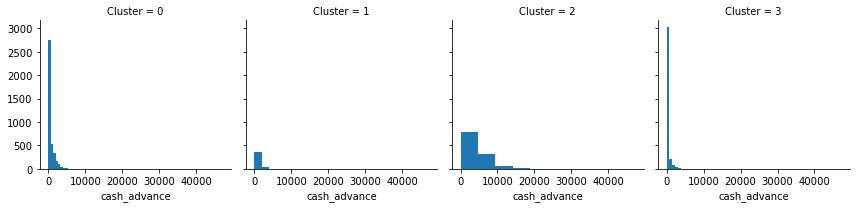

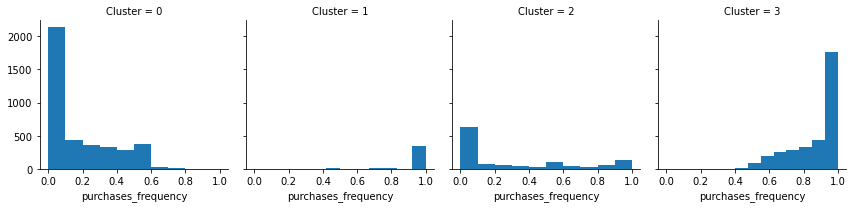

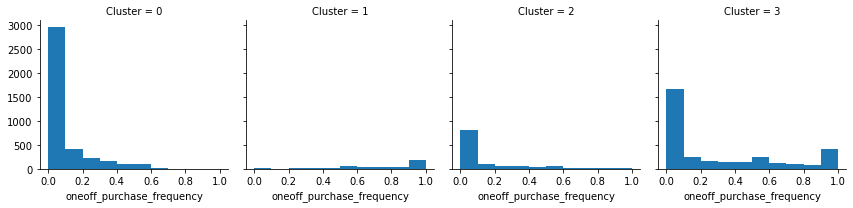

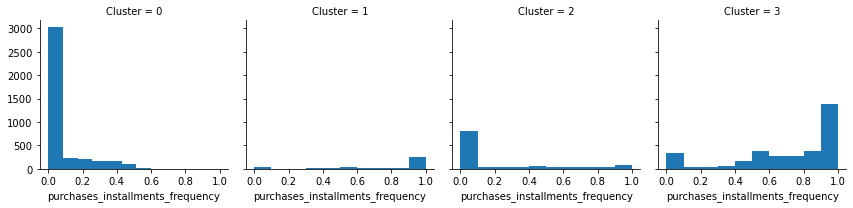

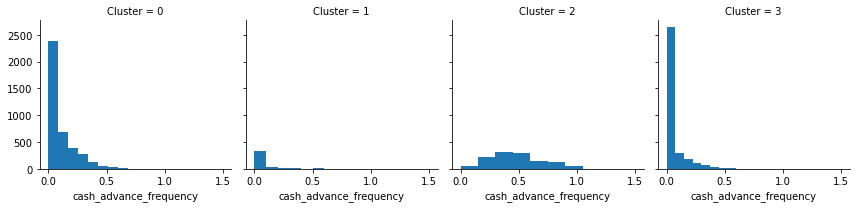

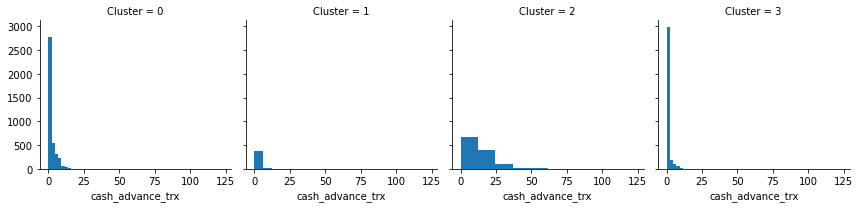

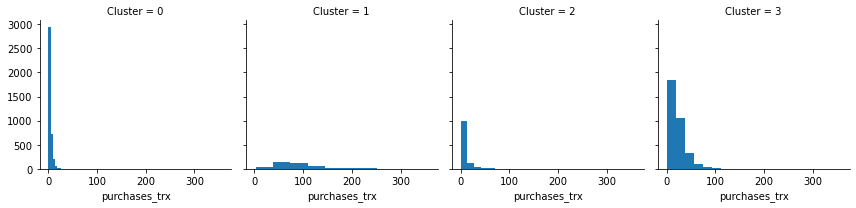

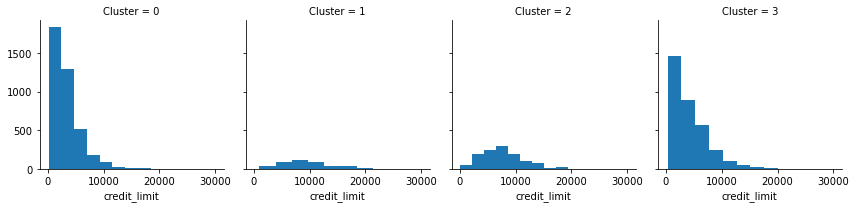

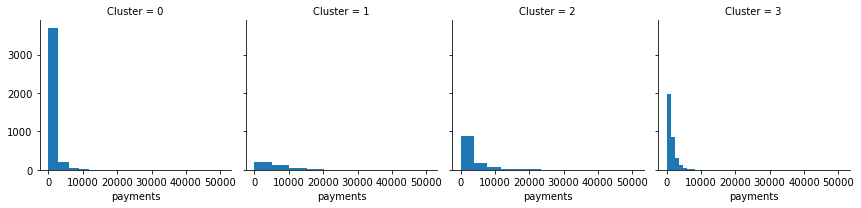

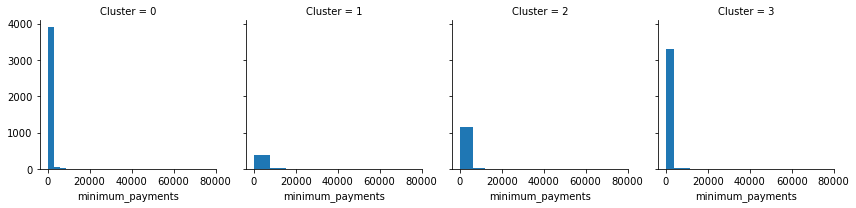

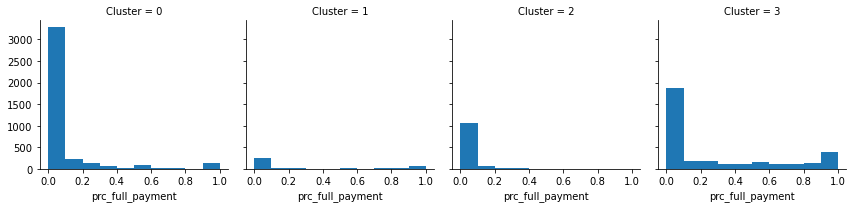

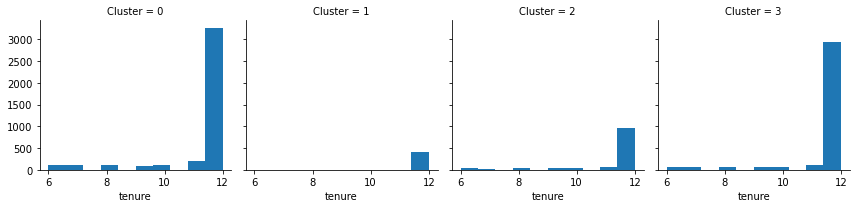

In [42]:
for c in cluster_df.drop(['Cluster'], axis = 1):
    grid = sns.FacetGrid(cluster_df, col = 'Cluster')
    grid = grid.map(plt.hist, c)
plt.show()

### Saving the Kmeans clustering model and the data with cluster label

In [43]:
import joblib
joblib.dump(kmeans_model, 'kmeans_model.pkl')

['kmeans_model.pkl']

In [44]:
cluster_df.to_csv('clustered_customer_data.csv')

### Training and testing Model accuracy and performance 

In [45]:
X = cluster_df.iloc[:,:-1]
y = cluster_df.iloc[:,-1]

In [46]:
#split our code into train and testing data

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [47]:
X_train

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
6311,4.588899,0.272727,249.96,0.00,249.96,0.000000,0.916667,0.000000,0.916667,0.000000,0,17,4000.0,248.437485,36.714951,0.100000,12
2583,234.183227,1.000000,617.30,169.80,447.50,282.667958,0.916667,0.166667,0.750000,0.250000,4,12,2500.0,1436.234437,169.803160,0.250000,12
2946,32.215585,1.000000,0.00,0.00,0.00,758.123122,0.000000,0.000000,0.000000,0.083333,3,0,7500.0,838.652563,216.581883,0.083333,12
3306,10.811047,0.454545,85.50,0.00,85.50,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,1500.0,245.987433,132.932707,1.000000,12
8142,226.306461,0.363636,0.00,0.00,0.00,788.235661,0.000000,0.000000,0.000000,0.166667,3,0,1200.0,184.701045,217.492643,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,1247.905033,1.000000,553.67,0.00,553.67,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,1200.0,1927.232575,1247.614497,0.083333,12
1759,5383.084424,1.000000,9736.61,3684.52,6052.09,2965.656802,1.000000,0.416667,1.000000,0.250000,7,135,9000.0,15824.735870,3364.021248,0.083333,12
6991,10.805893,0.166667,76.51,50.93,25.58,0.000000,0.166667,0.166667,0.166667,0.000000,0,2,2500.0,0.000000,864.206542,0.000000,6
2467,6437.924230,1.000000,716.76,54.46,662.30,2365.445125,1.000000,0.083333,0.916667,0.416667,10,33,7000.0,1364.331914,1968.717366,0.000000,12


In [48]:
X_test

,balance,balance_frequency,purchases,oneoff_purchases,installment_purchases,cash_advance,purchases_frequency,oneoff_purchase_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3816,396.376998,1.000000,286.74,52.49,234.25,0.000000,0.750000,0.083333,0.666667,0.000000,0,15,1000.0,232.783063,187.565813,0.000000,12
8034,1378.110585,1.000000,0.00,0.00,0.00,192.997392,0.000000,0.000000,0.000000,0.083333,1,0,2500.0,2673.832747,675.477318,0.083333,12
5939,112.016540,0.636364,825.00,600.00,225.00,0.000000,0.500000,0.083333,0.416667,0.000000,0,7,3000.0,218.826147,190.513321,0.200000,12
393,11209.370760,1.000000,11147.33,1137.40,10009.93,2728.576925,1.000000,0.250000,1.000000,0.166667,8,126,11000.0,7932.774020,17494.907350,0.000000,12
6517,644.933911,0.833333,7.26,0.00,7.26,966.749372,0.166667,0.000000,0.166667,0.166667,1,1,1500.0,431.732367,92.246251,0.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,1594.485356,1.000000,2650.91,2123.90,527.01,0.000000,1.000000,0.250000,1.000000,0.000000,0,33,7000.0,1416.618009,427.147060,0.000000,12
3263,67.869072,0.454545,502.52,0.00,502.52,0.000000,0.333333,0.000000,0.333333,0.000000,0,4,1000.0,1297.259048,140.879535,0.500000,12
6989,6.104302,0.272727,134.97,0.00,134.97,0.000000,0.250000,0.000000,0.250000,0.000000,0,6,4000.0,202.780964,42.148136,0.181818,12
5628,47.783061,0.181818,0.00,0.00,0.00,545.183508,0.000000,0.000000,0.000000,0.166667,2,0,3000.0,0.000000,864.206542,0.000000,12


In [49]:
# We will use decision tree

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
# Confusion Matrix
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[766   0  13  15]
 [  0  67   3   3]
 [ 21   2 207  12]
 [ 19   6  11 645]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       794
           1       0.89      0.92      0.91        73
           2       0.88      0.86      0.87       242
           3       0.96      0.95      0.95       681

    accuracy                           0.94      1790
   macro avg       0.92      0.92      0.92      1790
weighted avg       0.94      0.94      0.94      1790



### Saving model for future prediction

In [51]:
import pickle

In [52]:
f = 'final_model.pkl'
pickle.dump(model, open(f, 'wb'))

### Load pickle file

In [54]:
load_model = pickle.load(open(f, 'rb'))

result = load_model.score(X_test, y_test).round(2)
print(result, '% Accuracy')

0.94 % Accuracy
